In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [16]:
#importing data set
df = pd.read_csv('Student_Performance.csv', encoding="utf-8")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [17]:
#Encoding Extracurricular Coloumn 
mapping = {"Yes": 1, "No": 0}
df["Extracurricular Activities"] = df["Extracurricular Activities"].map(mapping)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Hours Studied                       0.373730
Previous Scores                     0.915189
Extracurricular Activities          0.024525
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

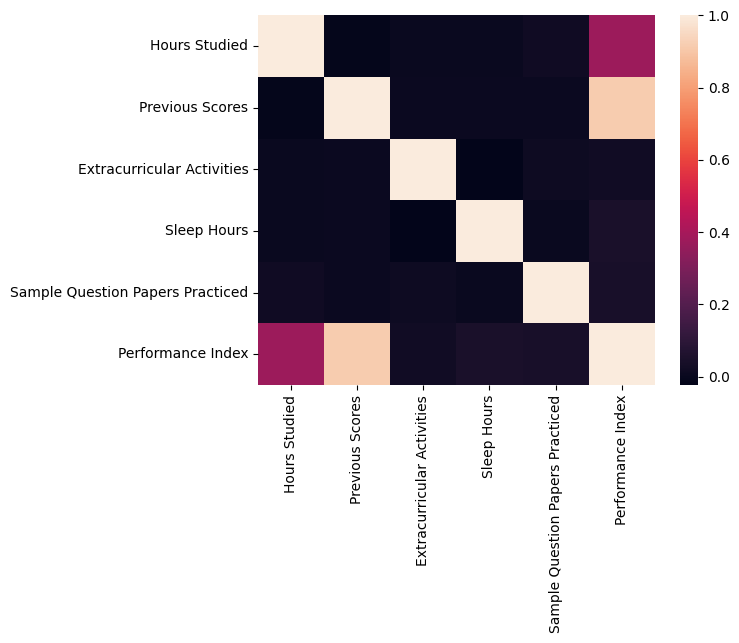

In [18]:
#Correlation heatmap
sns.heatmap(df.corr())
df.corr()['Performance Index']

In [19]:
df_nump = df.to_numpy()
df_nump.shape

(10000, 6)

In [20]:
#Split data into training/testing sets
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
#Create linear regression model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [22]:
#Predicting results of the testing set
y_predict = regressor.predict(X_test)
print(y_predict)

[50.45128503 53.09379171 78.24502652 ... 64.56863194 25.89718776
 18.82598463]


In [23]:
#Calc the coefficents 
print(regressor.coef_)

#Calc the intercept value 
print(regressor.intercept_)

[2.85191442 1.01886667 0.66530347 0.47682996 0.18776637]
-34.07520822521343


In [24]:
#Calc R squared value 
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9880686410711422

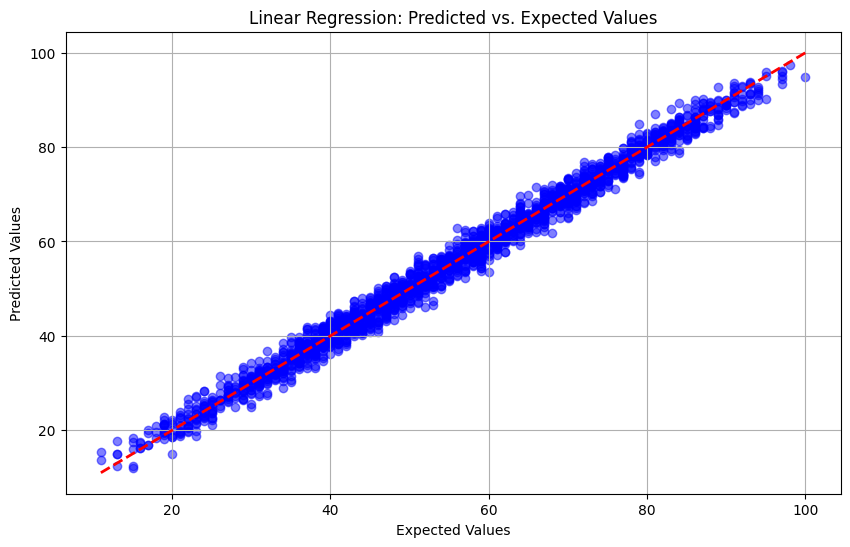

In [25]:
#Scatter plot to visualize predicted vs expected values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)  # 'alpha' sets the transparency of the points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.title('Linear Regression: Predicted vs. Expected Values')
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [32]:
#Allows user to input values for the features in order to test the created model

hours_studied = float(input("Enter the number of hours studied: "))
previous_scores = float(input("Enter the previous scores: "))
extracurricular_activities = int(input("Enter the number of extracurricular activities (1 for Yes, 0 for No): "))
sleep_hours = float(input("Enter the number of sleep hours: "))
sample_question_papers_practiced = float(input("Enter the number of sample question papers practiced: "))

#Create a feature vector from user input
user_input = np.array([hours_studied, previous_scores, extracurricular_activities, sleep_hours, sample_question_papers_practiced]).reshape(1, -1)

#Create a DataFrame from the user input with matching column names
user_df = pd.DataFrame(user_input, columns=['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'])

#Predict the performance index for the user input
user_performance_index = regressor.predict(user_df)
print(f"The predicted performance index for the given input is: {user_performance_index[0]}")



Enter the number of hours studied: 5
Enter the previous scores: 52
Enter the number of extracurricular activities (1 for Yes, 0 for No): 1
Enter the number of sleep hours: 5
Enter the number of sample question papers practiced: 2
The predicted performance index for the given input is: 36.59041666803431
